In [33]:
#!/usr/bin/env python3
"""mini project"""

__author__ = 'Yuchen YANG (YY5819@ic.ac.uk)'
__version__ = '0.0.1'

import re
import ipdb
import pandas as pd 
import seaborn as sns
import math
import numpy as np
import matplotlib.pyplot as plt
from lmfit import minimize, Parameters

In [34]:
RawData = pd.read_csv("../Data/LogisticGrowthData.csv")
#MetaData = pd.read_csv("../Data/LogisticGrowthMetaData.csv")
DataWithoutNeg = RawData[RawData.PopBio > 0]

In [46]:
DataWithoutNeg.insert(0, "ID", DataWithoutNeg.Species + "_" + DataWithoutNeg.Temp.map(str) + "_" + DataWithoutNeg.Medium + "_" + DataWithoutNeg.Citation)

ValueError: cannot insert ID, already exists

In [36]:
DataWithoutNeg.ID = pd.Series(DataWithoutNeg.ID).astype('category').cat.codes.values

In [37]:
data_subset = DataWithoutNeg[DataWithoutNeg['ID'] == 94]
data_subset

,ID,X,Time,PopBio,Temp,Time_units,PopBio_units,Species,Medium,Rep,Citation
0,94,1,6.698795e+02,0.283276,5,Hours,OD_595,Chryseobacterium.balustinum,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., ..."
1,94,2,6.469880e+02,0.283342,5,Hours,OD_595,Chryseobacterium.balustinum,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., ..."
2,94,3,6.228916e+02,0.285151,5,Hours,OD_595,Chryseobacterium.balustinum,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., ..."
3,94,4,5.975904e+02,0.281746,5,Hours,OD_595,Chryseobacterium.balustinum,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., ..."
4,94,5,5.746988e+02,0.273117,5,Hours,OD_595,Chryseobacterium.balustinum,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., ..."
5,94,6,5.506024e+02,0.257534,5,Hours,OD_595,Chryseobacterium.balustinum,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., ..."
6,94,7,5.265060e+02,0.257604,5,Hours,OD_595,Chryseobacterium.balustinum,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., ..."
7,94,8,5.024096e+02,0.245500,5,Hours,OD_595,Chryseobacterium.balustinum,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., ..."
8,94,9,4.795181e+02,0.247306,5,Hours,OD_595,Chryseobacterium.balustinum,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., ..."
9,94,10,4.542169e+02,0.250857,5,Hours,OD_595,Chryseobacterium.balustinum,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., ..."


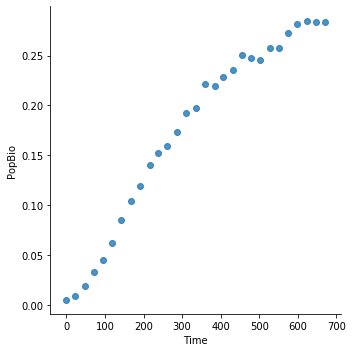

In [38]:
sns.lmplot("Time", "PopBio", data = data_subset, fit_reg = False) # will give warning - you can ignore it

In [39]:
######################### Population Growth Curve #########################
def genPopGrowthCurve(startingPop, time, carryingCapacity, maxGrowthRate):
    #Starting Pop
    N0 = startingPop
    #Time
    t = range(time)
    #Carrying Capacity
    Nmax = carryingCapacity
    #Maximum Growth Rate
    rmax = maxGrowthRate
    #Pop data
    nList = []
    for i in t:
        nList.append((N0 * Nmax * math.exp(rmax * i)) / (Nmax + N0 * (math.exp(rmax*i) - 1)))
    return t, nList

In [1]:
######################### not in use for now #####################
######################### GOMPERTZ MODEL #########################
def genGompertzCurve(startingPop, time, carryingCapacity, maxGrowthRate, tlag):
    #Starting Pop
    N0 = startingPop
    #Time
    t = range(time)
    #Carrying Capacity
    Nmax = carryingCapacity
    #Maximum Growth Rate
    rmax = maxGrowthRate
    #asymptote
    A = Nmax / N0
    #Pop data
    nList = []
    for i in t:
        nList.append((A * math.exp(-math.exp(((rmax * math.exp(1) * (tlag - i)) / A) + 1))))
    return t, nList

In [ ]:
######################### POLYNOMIAL EQUATION #####################
b0 = 1
b1 = 1
b2 = 1
b3 = 1
b4 = 1
x = 1:50
y1 = b0 + b1*x
y2 = b0 + b1*x + b2*(x^2)
y3 = b0 + b1*x + b2*(x^2) + b3*(x^3)
y4 = b0 + b1*x + b2*(x^2) + b3*(x^3) + b4*(x^4)
par(mfrow=c(2,2))
plot(x, y1)
plot(x, y2)
plot(x, y3)
plot(x, y4)

In [40]:
popX, popY = genPopGrowthCurve(1,1000,100,.01)
gomX, gomY = genGompertzCurve(1,1000,100,.4,200)

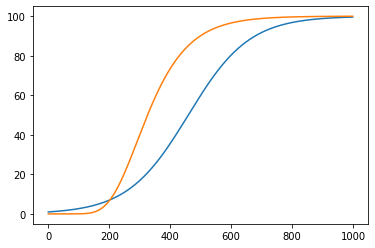

In [41]:
plt.plot(popX, popY)
plt.plot(gomX, gomY)

In [45]:
t = data_subset.Time
modeldata = data_subset.PopBio
def popGrowthCurve(params, t, modeldata):
    N0 = params['startingPop']
    rmax = params['carryingCapacity']
    Nmax = params['maxGrowthRate']

    model = (N0 * Nmax * np.exp(rmax * t)) / (Nmax + N0 * (np.exp(rmax*t) - 1))

    return model - modeldata


params = Parameters()
params.add('startingPop', value=1)
params.add('carryingCapacity', value=100)
params.add('maxGrowthRate', value=0.1)

print(t)
print(modeldata)
out = minimize(popGrowthCurve, params, args=(t, modeldata))

0     6.698795e+02
1     6.469880e+02
2     6.228916e+02
3     5.975904e+02
4     5.746988e+02
5     5.506024e+02
6     5.265060e+02
7     5.024096e+02
8     4.795181e+02
9     4.542169e+02
10    4.313253e+02
11    3.843373e+02
12    4.060241e+02
13    3.590361e+02
14    3.108434e+02
15    3.349398e+02
16    2.614458e+02
17    2.867470e+02
18    2.156627e+02
19    2.385542e+02
20    1.903614e+02
21    1.662651e+02
22    1.421687e+02
23    1.192771e+02
24    9.518072e+01
25    7.108434e+01
26    4.698795e+01
27    2.289157e+01
28   -1.421085e-14
Name: Time, dtype: float64
0     0.283276
1     0.283342
2     0.285151
3     0.281746
4     0.273117
5     0.257534
6     0.257604
7     0.245500
8     0.247306
9     0.250857
10    0.235272
11    0.219756
12    0.228388
13    0.221568
14    0.192142
15    0.197290
16    0.159242
17    0.173082
18    0.140244
19    0.152352
20    0.119448
21    0.103866
22    0.084805
23    0.062263
24    0.044942
25    0.032837
26    0.018994
27    0.008629
28

ValueError: NaN values detected in your input data or the output of your objective/model function - fitting algorithms cannot handle this! Please read https://lmfit.github.io/lmfit-py/faq.html#i-get-errors-from-nan-in-my-fit-what-can-i-do for more information.